# NOTEBOOK 14 Hittegolven
---

Op canvas staat een csv bestand `minmaxtemperatuur.csv` met daarin de minimale en maximale temperatuur per dag over het jaar 2020 zoals gemeten in het meetstation Twente. De file bestaat uit vier kolommen met getallen. De eerste kolom geeft de maand (1 t/m 12), de tweede kolom geeft de dag binnen de maand, de derde kolom is de minimale temperatuur die gemeten is op die dag en de vierde kolom is de maximale temperatuur die op die dag gemeten is. De temperaturen zijn in graden Celsius. In deze opdracht maak je een plot van de gegevens in de file.  




---
**Assignment 14.1**

Schrijf code die:

- de data van de file inleest in een 2D numpy array.
- een lijnplot maakt met op de x-as de tijd (in dagen van 1 t/m 366) en op de y-as de minimale (blauw) en maximale (rood) temperatuur.
- een geschikte legend aan de plot toevoegt.
- geschikte as-labels aan de figuur toevoegt.


<Axes: xlabel='Dagen', ylabel='Temperatuur'>

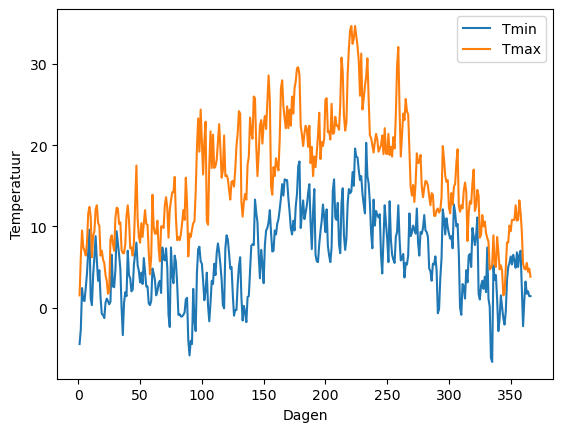

In [174]:
import calendar

# =============== YOUR CODE GOES HERE =================
import pandas as pd

df = pd.read_csv('minmaxtemperatuur.csv')
df['Dagen'] = range(1, len(df)+1)
df.plot(x='Dagen', y='Tmin Tmax'.split(), ylabel = 'Temperatuur')

---
**Assignment 14.2**

Schrijf code die: 

- Het aantal zomerse dagen bepaalt (dagen waarbij de maximale temperatuur minimaal 25.0 graden Celcius is)

- Het aantal tropische dagen bepaalt (dagen waarbij de maximale temperatuur minimaal 30.0 graden Celcius is)

In [165]:
# =============== YOUR CODE GOES HERE =================
import pandas as pd

df = pd.read_csv('minmaxtemperatuur.csv')
ZomerseDagen = len(df.loc[df['Tmax'] > 25])
TropischeDagen = len(df.loc[df['Tmax'] > 30])

print(f"Aantal Zomerse dagen: {ZomerseDagen}\nAantal Tropische dagen: {TropischeDagen}")

Aantal Zomerse dagen: 38
Aantal Tropische dagen: 13


---
**Assignment 14.3**

Schrijf code die bepaalt op welke dagen er sprake was van een hittegolf. Een hittegolf is een serie van minstens 5 zomerse dagen, waarvan er zeker 3 tropisch zijn. Tussen twee verschillende hittegolven zit altijd minimaal één dag waarbij de maximale temperatuur lager is dan 25 graden Celsius. Het script moet alle! hittegolven van 2020 printen naar de console waarbij zowel de eerste dag, de laatste dag en de duur van de hittegolf wordt weergegeven.


In [169]:
# =============== YOUR CODE GOES HERE =================
import pandas as pd
import calendar




,Maand,Dag,Tmin,Tmax
0,Jan,1,-4.5,1.5
1,Jan,2,-2.7,6.2
2,Jan,3,2.4,9.5
3,Jan,4,0.9,7.4
4,Jan,5,0.8,7.0
...,...,...,...,...
361,Dec,27,3.2,4.7
362,Dec,28,1.7,5.5
363,Dec,29,2.0,4.4
364,Dec,30,1.4,4.8


---
**Assignment 14.4**

- Bereken voor elke maand het gemiddelde van de maximale temperaturen. 
- Maak een barplot (check website van matplotlib) met op de x-as het nummer van de maand (of de naam van de maand als dat lukt) en op de y-as het gemiddelde van de maximale temperatuur van de betreffende maand.


In [189]:
# =============== YOUR CODE GOES HERE =================
import pandas as pd
import calendar
import numpy as np

Januari = df.loc[df['Maand'] == 1]
Februari = df.loc[df['Maand'] == 2] 
Maart = df.loc[df['Maand'] == 3] 
April = df.loc[df['Maand'] == 4] 
Mei = df.loc[df['Maand'] == 5] 
Juni = df.loc[df['Maand'] == 6] 
Juli = df.loc[df['Maand'] == 7] 
Augustus = df.loc[df['Maand'] == 8] 
September = df.loc[df['Maand'] == 9] 
Oktober = df.loc[df['Maand'] == 10] 
November = df.loc[df['Maand'] == 11] 
December = df.loc[df['Maand'] == 12] 

